# Part 1: Prepare the Data

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path

In [2]:
# Loading data
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
labels = df['MYOPIC']
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [4]:
# Drop the MYOPIC column
df = df.drop(["MYOPIC"], axis='columns')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Part 2: Apply Dimensionality Reduction

In [6]:
# Initialize PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)

myopia_pca = pca.fit_transform(scaled_data)

In [7]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2", "principal component 3", "principal component 4",
                             "principal component 5", "principal component 6", "principal component 7", "principal component 8",
                             "principal component 9", "principal component 10"]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [8]:
# Fetch the explained variance
print(f'Explained Variance Ration: {pca.explained_variance_ratio_}')

Explained Variance Ration: [0.21177355 0.15659716 0.08688023 0.08301762 0.07584858 0.06997878
 0.06486986 0.06377808 0.05393666 0.05205566]


*The shape of the reduced dataset has 10 features compared to the original dataset which had 14 features*

In [9]:
# Initialize t-SNE model
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=35)

In [10]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

C:\Users\erico\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [11]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

<function matplotlib.pyplot.show(*args, **kw)>

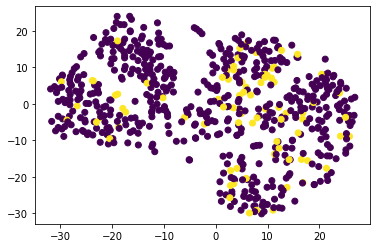

In [12]:
# Prepare to plot the dataset
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show

*No distinct clusters are evident from this plot*

# Part 3: Perform a Cluster Analysis with K-means

In [13]:
from sklearn.cluster import KMeans
import numpy as np

In [14]:
# Get two principal components for the data.
new_df = pd.DataFrame(
    tsne_features, columns=["principal component 1", "principal component 2"])
new_df.head()

,principal component 1,principal component 2
0,25.839233,-8.869257
1,2.198847,9.973526
2,-16.056623,9.553818
3,-18.939167,2.712131
4,8.381104,-3.245420


C:\Users\erico\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


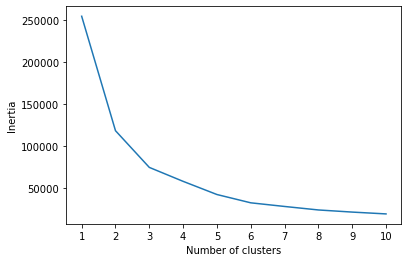

In [15]:
inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

*The optimal k value is 5*

# Part 4: Make a Recommendation

In [16]:
# using optimal value of k = 5

# Initialize the K-Means model
km_model = KMeans(n_clusters=5, random_state=42)

# Train the model
km_model.fit(new_df)

# Predict Clusters
predicted_clusters = km_model.predict(new_df)

# Create return DataFrame with predicted clusters
new_df['class'] = km_model.labels_

new_df.head()

,principal component 1,principal component 2,class
0,25.839233,-8.869257,1
1,2.198847,9.973526,2
2,-16.056623,9.553818,0
3,-18.939167,2.712131,3
4,8.381104,-3.245420,2


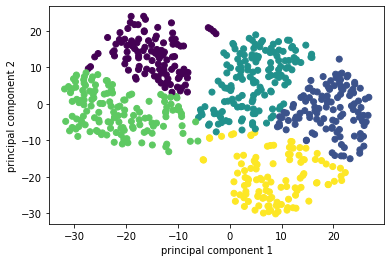

In [17]:
# Creating a plot to analyze the clusters

plt.scatter(x=new_df['principal component 1'], y=new_df['principal component 2'], c=new_df['class'])
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()

*There now appears to be 5 distinct clusters. Based on the plot above, we can infer that the patients could be clustered into 5 groups*